In [39]:
import sys
sys.path.insert(0,'..')

import pandas as pd
from slha_loader.slha_loader import SLHALoader
import altair as alt
import altair_viewer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
def neutralino_data(feat_dir, target_dir):
    neutralinos = [
        "1000022",
        # "1000023",
        # "1000025",
        # "1000035",
    ]  # neutralinos[i] = neutralino i.
    dfs = []
    for neutralino in neutralinos:
        process = [neutralino] * 2
        dl = SLHALoader(process, feat_dir, target_dir)

        features = dl.features[neutralino]
        targets = dl.targets["nlo"]
        df = pd.concat([features, targets], axis=1)
        dfs.append(df)
    df = pd.concat(dfs, axis=1)
    return df

In [41]:
def get_altair_chart(particle_id, process, df):
    alt.data_transformers.disable_max_rows()
    chart = alt.Chart(df).mark_point().encode(
                x = alt.X(
                    particle_id,
                ),
                y = alt.Y(
                    process,
                    scale=alt.Scale(type="symlog"),
                )
            ).interactive()
    return chart

In [42]:
def plot_seaborn(df, particle_id, process):
    sns.scatterplot(df)
    plt.show()

In [43]:
target_dir = "../targets"
feat_dir = "../features"

In [44]:
df = neutralino_data(feat_dir, target_dir)

In [45]:
mass = df["1000022"]
# processes = ["(1000022, 1000022)", "(1000023, 1000023)", "(1000025, 1000025)", "(1000035, 1000035)"]
processes = ["(1000022, 1000022)"]

In [46]:
chart = get_altair_chart(particle_id="1000022", process="(1000022, 1000022)", df=df)

In [47]:
idx_pos = mass >= 0.
idx_neg = mass < 0.

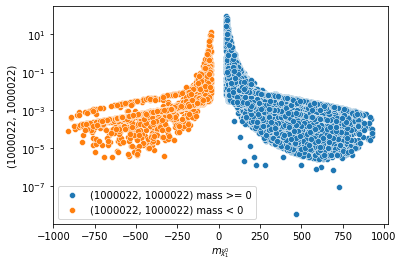

In [48]:
for process in processes:
    plt.figure()
    sns.scatterplot(x=mass.loc[idx_pos], y=df[process].loc[idx_pos], label=process + " mass >= 0")
    sns.scatterplot(x=mass.loc[idx_neg], y=df[process].loc[idx_neg], label=process + " mass < 0")
    plt.xlabel(r"$m_{\tilde{\chi}_1^0}$")
    
    plt.yscale("log")
plt.legend()

In [33]:
neutralinos = [
        "1000022",
        "1000023",
        "1000025",
        "1000035",
    ]  # neutralinos[i] = neutralino i.


df[processes] = np.log10(df[processes])


/Users/reneaas/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


In [34]:
my_chart = alt.Chart(df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    width=120,
    height=120,
).repeat(
    row=processes,
    column=neutralinos,
)

#alt.renderers.enable('altair_saver', fmts=['vega-lite', 'pdf'])
altair_viewer.show(my_chart)
#my_chart.save("chart.png")

Displaying chart at http://localhost:52207/


In [35]:
print(alt.__version__)

4.1.0


In [15]:
print(df)

       1000022  (1000022, 1000022)  1000023  (1000023, 1000023)  1000025  \
0      -205.97           -2.733322  213.570           -3.593886  -279.98   
1       493.57           -2.868863 -528.600           -4.023636  -587.55   
2        16.95                 NaN  -27.089                 NaN   501.40   
3       329.69           -2.238794 -742.460           -3.611135   929.67   
4       559.13           -3.804792 -612.140           -6.492400   625.75   
...        ...                 ...      ...                 ...      ...   
16885   305.60           -2.971754  632.890           -2.750826  -837.60   
16886   344.01           -3.014187  681.210           -2.841879  -852.10   
16887   327.98           -2.266971 -460.030           -5.291656   470.18   
16888  -102.49           -2.609347  486.610           -2.495407  -770.02   
16889   249.97           -2.864009  310.980           -2.243531  -508.42   

       (1000025, 1000025)  1000035  (1000035, 1000035)  
0               -2.916282   74